In [1]:
"""
HEMI–ORTT Simulation Suite
---------------------------
Numerical reproduction of the three worked examples from the
Harsha Energy–Momentum Interaction (HEMI) theory, including
Object-Relative Temporal Theory (ORTT) entropy feedback coupling.

Outputs: one PDF per figure in ./hemi_outputs/
"""

import numpy as np
import matplotlib.pyplot as plt
import os

# ======================================================
# 1. CONSTANTS AND PARAMETERS
# ======================================================
G = 6.674e-11          # gravitational constant [m^3 / kg / s^2]
c = 3.0e8              # speed of light [m/s]
M_sun = 1.989e30       # mass of the Sun [kg]
R_sun = 6.96e8         # radius of the Sun [m]
M_earth = 5.972e24     # mass of Earth [kg]
R_earth = 6.371e6      # radius of Earth [m]
h = 400e3              # satellite altitude [m]

# HEMI–ORTT parameters
alpha = 0.0            # strong-field correction (not dominant here)
beta = 1e-9            # quantum energy coupling
gamma = 1e-9           # orbital feedback coefficient
E0 = 1.0               # reference energy scale [eV]
gamma_Sdot = 1e-5      # entropy-rate coupling (ORTT term)
Sdot_values = np.linspace(0, 1, 200)  # entropy production range (arbitrary units)

# Directory setup
os.makedirs("hemi_outputs", exist_ok=True)


✅ Saved hemi_outputs/example1_photon_deflection.pdf


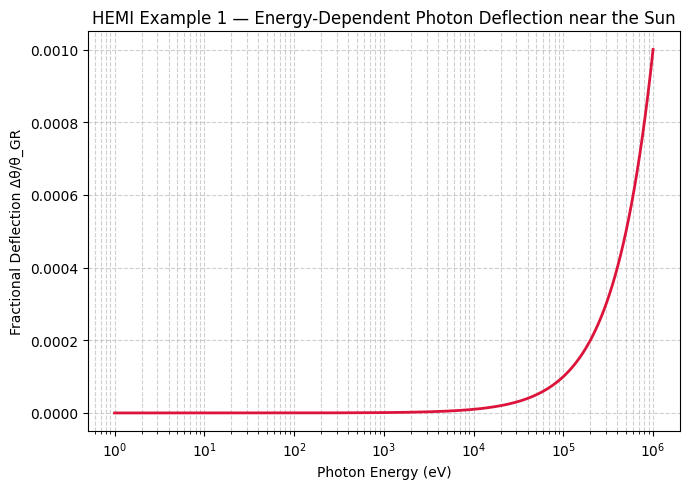

In [2]:
# ======================================================
# 2. EXAMPLE 1 — Energy-dependent photon deflection
# ======================================================
def hemi_photon_deflection(E_eV, beta, E0):
    theta_GR = 4 * G * M_sun / (c**2 * R_sun)  # radians
    return theta_GR * (1 + beta * E_eV / E0)

energies = np.logspace(0, 6, 200)  # 1 eV to 1 MeV
theta_GR = 4 * G * M_sun / (c**2 * R_sun)
theta_HEMI = hemi_photon_deflection(energies, beta, E0)

plt.figure(figsize=(7,5))
plt.plot(energies, (theta_HEMI - theta_GR)/theta_GR, color='crimson', lw=2)
plt.xscale('log')
plt.xlabel("Photon Energy (eV)")
plt.ylabel("Fractional Deflection Δθ/θ_GR")
plt.title("HEMI Example 1 — Energy-Dependent Photon Deflection near the Sun")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.savefig("hemi_outputs/example1_photon_deflection.pdf")
print("✅ Saved hemi_outputs/example1_photon_deflection.pdf")

✅ Saved hemi_outputs/example2_clock_shift.pdf


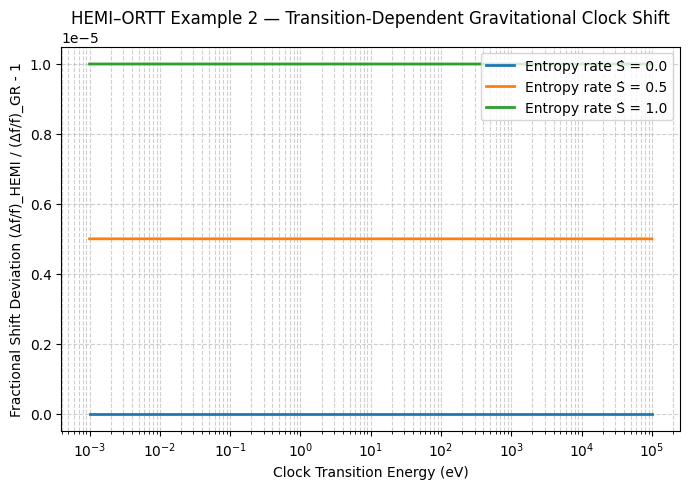

In [3]:
# ======================================================
# 3. EXAMPLE 2 — Transition-dependent clock shift (with ORTT entropy)
# ======================================================
def hemi_clock_shift(E_transition, beta, E0, Sdot, gamma_Sdot):
    phi = -G * M_earth / (R_earth + h)
    shift_GR = phi / c**2
    fG = 1 + beta * E_transition / E0 + gamma_Sdot * Sdot
    return shift_GR * fG

E_trans = np.logspace(-3, 5, 200)  # from meV to 100 keV
shifts = []
for Sdot in [0.0, 0.5, 1.0]:  # three entropy regimes
    shift = hemi_clock_shift(E_trans, beta, E0, Sdot, gamma_Sdot)
    shifts.append(shift)

plt.figure(figsize=(7,5))
for Sdot, shift in zip([0.0, 0.5, 1.0], shifts):
    plt.plot(E_trans, (shift - shifts[0]) / shifts[0],
             label=f"Entropy rate Ṡ = {Sdot:.1f}", lw=2)
plt.xscale('log')
plt.xlabel("Clock Transition Energy (eV)")
plt.ylabel("Fractional Shift Deviation (Δf/f)_HEMI / (Δf/f)_GR - 1")
plt.title("HEMI–ORTT Example 2 — Transition-Dependent Gravitational Clock Shift")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.savefig("hemi_outputs/example2_clock_shift.pdf")
print("✅ Saved hemi_outputs/example2_clock_shift.pdf")

✅ Saved hemi_outputs/example3_orbital_feedback.pdf


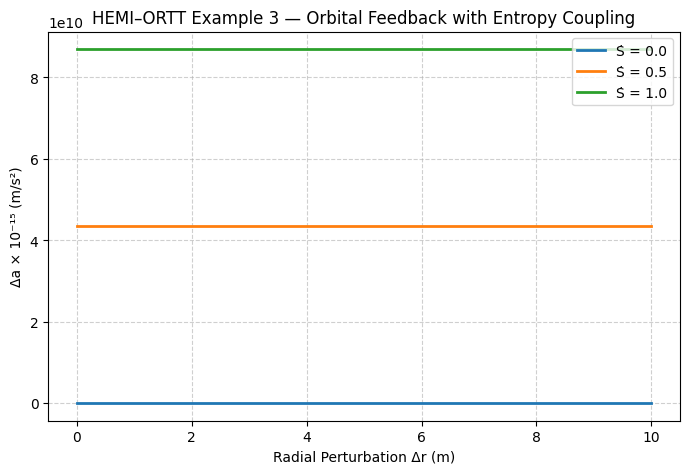

In [4]:
# ======================================================
# 4. EXAMPLE 3 — Orbital feedback and entropy coupling
# ======================================================
r = R_earth + h
ar = G * M_earth / r**2
dr = np.linspace(0, 10, 200)

def hemi_orbital_feedback(dr, gamma, r, Sdot, gamma_Sdot):
    fG = 1 + gamma * dr / r + gamma_Sdot * Sdot
    return ar * fG

plt.figure(figsize=(7,5))
for Sdot in [0.0, 0.5, 1.0]:
    a_vals = hemi_orbital_feedback(dr, gamma, r, Sdot, gamma_Sdot)
    plt.plot(dr, (a_vals - ar)*1e15, lw=2, label=f"Ṡ = {Sdot:.1f}")

plt.xlabel("Radial Perturbation Δr (m)")
plt.ylabel("Δa × 10⁻¹⁵ (m/s²)")
plt.title("HEMI–ORTT Example 3 — Orbital Feedback with Entropy Coupling")
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.tight_layout()
plt.savefig("hemi_outputs/example3_orbital_feedback.pdf")
print("✅ Saved hemi_outputs/example3_orbital_feedback.pdf")